In [40]:
# http://aimotion.blogspot.com/2011/10/machine-learning-with-python-linear.html

In [13]:
import psycopg2
import datetime
from dateutil import parser

In [14]:
host = 'billingcluster.c1ryz9ousvcz.us-east-1.redshift.amazonaws.com'
dbname = 'dev'
port = 5439
user = 'billing'
pwd = 'Sungard01'

In [15]:
#account_id = '089476987273'
account_id = '266593598212'
fwrite = open('../billing/%s.csv' % (account_id), 'w')

In [16]:
con = psycopg2.connect(dbname=dbname, host=host, port=port, user=user, password=pwd)
cur = con.cursor()

In [17]:
current_date = datetime.datetime.today()
#current_date = datetime.datetime(2017,3,1)
start_date = datetime.datetime(2016, 8, 1)

In [18]:
while current_date.date() > start_date.date():
    if current_date.year == start_date.year and current_date.month == start_date.month:
        next_date = datetime.datetime(current_date.year, current_date.month, current_date.day)
        if next_date < start_date:
            break
    else:
        next_date = start_date + datetime.timedelta(days=31)
        next_date = datetime.datetime(next_date.year, next_date.month, 1)
    sql = "select cast(lineitem_usageenddate as datetime) enddatetime, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999990D00') unblended"
    sql += " from AWSBilling%s" % (start_date.strftime('%Y%m'))
    sql += " where lineitem_usageaccountid = '%s'" %(account_id)
    sql += " and lineitem_usageenddate < '%s'" % (next_date.strftime('%Y-%m-%d'))
    sql += " and datediff(hour,cast(lineitem_usagestartdate as datetime),cast(lineitem_usageenddate as datetime)) = 1"
    sql += " group by enddatetime order by enddatetime"
    print(sql);
    """print('start_date : %s' % start_date)
    print('next_date : %s' % next_date)
    start_date = next_date"""

    cur.execute(sql)
    for row in cur.fetchall():
        target_datetime = parser.parse(str(row[0]))
        fwrite.write("%s%02d,%s\n" % (target_datetime.weekday(), target_datetime.hour, row[1]))
        #fwrite.write("%s,%s\n" % (str(row[0]), row[1]))
        #timestamp = (parser.parse(str(row[0])).strftime('%s'))
        #fwrite.write("%s,%s\n" % (timestamp, row[1]))

    start_date = next_date

select cast(lineitem_usageenddate as datetime) enddatetime, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999990D00') unblended from AWSBilling201608 where lineitem_usageaccountid = '266593598212' and lineitem_usageenddate < '2016-09-01' and datediff(hour,cast(lineitem_usagestartdate as datetime),cast(lineitem_usageenddate as datetime)) = 1 group by enddatetime order by enddatetime
select cast(lineitem_usageenddate as datetime) enddatetime, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999990D00') unblended from AWSBilling201609 where lineitem_usageaccountid = '266593598212' and lineitem_usageenddate < '2016-10-01' and datediff(hour,cast(lineitem_usagestartdate as datetime),cast(lineitem_usageenddate as datetime)) = 1 group by enddatetime order by enddatetime
select cast(lineitem_usageenddate as datetime) enddatetime, to_char(sum(cast(lineitem_unblendedcost as float)), 'FM999990D00') unblended from AWSBilling201610 where lineitem_usageaccountid = '266593598212' and li

In [19]:
fwrite.close()
cur.close()
con.close()

In [20]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [21]:
data = loadtxt('../billing/%s.csv' % account_id, delimiter=',')

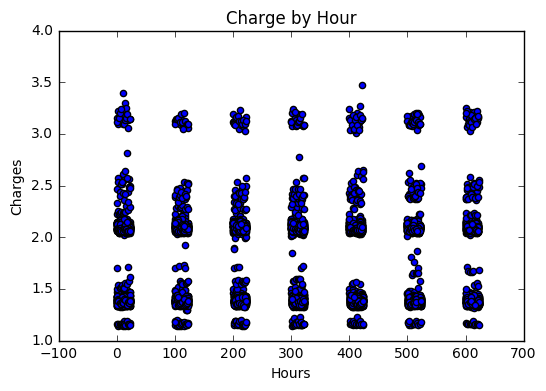

In [22]:
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Charge by Hour')
xlabel('Hours')
ylabel('Charges')
show()

In [44]:
X = data[:, 0]
y = data[:, 1]

In [45]:
m = y.size

In [46]:
it = ones(shape=(m, 2))
it

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       ..., 
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [47]:
it[:, 1] = X
it

array([[   1.,    1.],
       [   1.,    2.],
       [   1.,    3.],
       ..., 
       [   1.,  621.],
       [   1.,  622.],
       [   1.,  623.]])

In [59]:
#theta = zeros(shape=(2, 1))
theta = [[0], [0]]
theta

[[0], [0]]

In [60]:
iterations = 1500
alpha = 0.01

In [61]:
X

array([   1.,    2.,    3., ...,  621.,  622.,  623.])

In [58]:
m = y.size
predictions = X.dot(theta).flatten()
sqErrors = (predictions - y) ** 2
J = (1.0 / (2 * m)) * sqErrors.sum()

ValueError: shapes (6207,) and (2,1) not aligned: 6207 (dim 0) != 2 (dim 0)

In [29]:
import pandas

In [38]:
charges = pandas.read_csv('../billing/%s.csv' % account_id)
charges

,001,1.70
0,2,1.42
1,3,1.14
2,4,1.41
3,5,1.15
4,6,1.49
5,7,1.15
6,8,1.43
7,9,1.15
8,10,1.43
9,11,1.14


In [31]:
print charges.columns

Index([u'001', u'1.70'], dtype='object')


In [32]:
print charges.shape

(6206, 2)


In [33]:
import matplotlib.pyplot as plt

In [41]:
plt.hist(charges['1.70'])

(array([ 1715.,  1319.,    25.,   778.,  1959.,   190.,    21.,     2.,
          188.,     9.]),
 array([ 1.14 ,  1.373,  1.606,  1.839,  2.072,  2.305,  2.538,  2.771,
         3.004,  3.237,  3.47 ]),
 <a list of 10 Patch objects>)

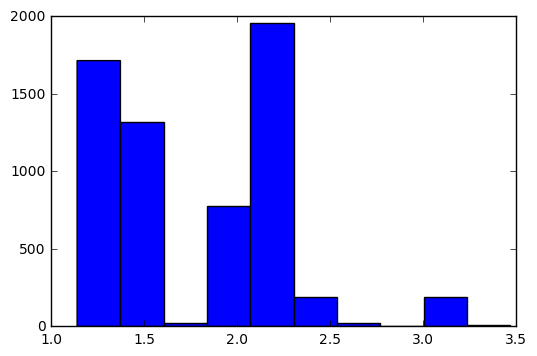

In [42]:
plt.show()